In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from voltagebudget import *
from fakespikes import util as fsutil

In [2]:
t = 0.3

k = 20
t_stim = 0.14
dt = 1e-4
w = 1e-4
a = 10000
ns, ts = util.k_spikes(t_stim, k, w, a=a, dt=dt, seed=None)

times = fsutil.create_times(t, dt)

In [6]:
N = 100
w_in = 0.3e-9
bias = 5e-10

f = 8 # 50
A = .5e-10

r_b = 0.0

window = [t_stim + 1e-3, t_stim + 50e-3]

ns_e, ts_e, vs = neurons.adex(t, N, 
                              ns, ts, 
                              w_in=(0.3e-9, 0.3e-9),
                              bias=(5e-10, 5e-10 / 20),
                              a=(-1.0e-9, 1.0e-9),
                              b=(10e-12, 60.0e-12),
                              Ereset=(-48e-3, -55e-3),
                              f=f, A=A, phi=0,
                              r_b=r_b,
                              time_step=dt)

Starting simulation at t=0. s for a duration of 300. ms
300. ms (100%) simulated in < 1s
Starting simulation at t=0. s for a duration of 300. ms
300. ms (100%) simulated in < 1s


In [7]:
C = util.estimate_communication(times, ns_e, ts_e, window)
sigma_e = util.estimate_computation(times, ns_e, ts_e, window)

print("C {}, sigma_e {}".format(C, sigma_e))

C 0.6, sigma_e 0.00963526743315


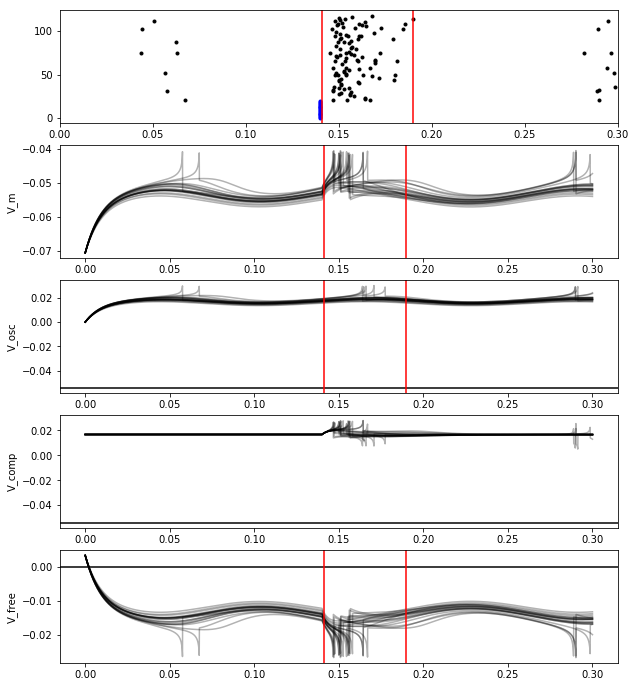

In [8]:
plt.figure(figsize=(10, 12))
plt.subplot(511)
plt.plot(ts, ns, '.b')
plt.plot(ts_e, ns_e + k, '.k')
plt.axvline(window[0], color='red')
plt.axvline(window[1], color='red')
plt.xlim(0, .3)

plt.subplot(512)
for j in range(20):
    plt.plot(times, vs['vm'][j, :], 'k', alpha=0.3);
# plt.ylim(-70e-3, -50e-3)
plt.axvline(window[0], color='red')
plt.axvline(window[1], color='red')
plt.ylabel("V_m")

plt.subplot(513)
for j in range(20):
    plt.plot(times, vs['osc'][j, :], 'k', alpha=0.3);
plt.axhline(-54e-3, color='black')
# plt.ylim(-70e-3, -50e-3)
plt.axvline(window[0], color='red')
plt.axvline(window[1], color='red')
plt.ylabel("V_osc")

plt.subplot(514)
for j in range(20):
    plt.plot(times, vs['comp'][j, :], 'k', alpha=0.3);
plt.axhline(-54e-3, color='black')
# plt.ylim(-70e-3, -50e-3)
# plt.axvline(t_stim + 2e-3, color='red')
# plt.axvline(t_stim + 12e-3, color='red')
plt.ylabel("V_comp")

plt.subplot(515)
for j in range(20):
    plt.plot(times, vs['free'][j, :], 'k', alpha=0.3);
plt.axhline(0, color='black')
plt.ylabel("V_free")
plt.axvline(window[0], color='red')
plt.axvline(window[1], color='red')

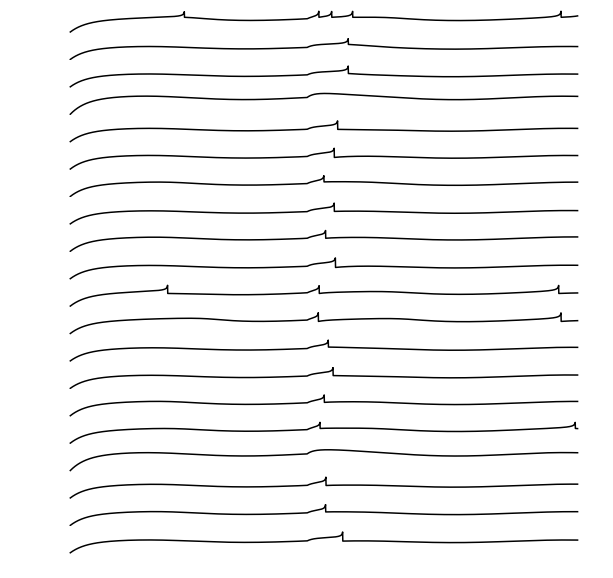

In [9]:
plt.figure(figsize=(10, 10))
for j in range(1, 21):
    plt.subplot(20, 1, j)
    plt.plot(times, vs['vm'][j, :], 'k', alpha=1);
    plt.axis('off')